# **OCR-free Document Understanding Transformer**
OCR이 필요 없는 새로운 VDU(시각 문서 이해) model <span style="background-color:#fff5b1">**Donut**</span>을 제안함

---

## **Keywords**
#### **Visual Document Understanding (VDU)**
**시각 문서 이해**: 문서 이미지(예: 송장, 영수증, 명함 등)를 분석하고 그 안에 포함된 정보를 추출하는 기술
- CV + NLP 기술 결합 -> text를 읽고 문서의 layout과 구조를 이해하는 작업 수행
- 응용 분야: 문서 분류, 정보 추출, 시각적 질문 응답(VQA)
#### **Document Information Extraction**
**문서 정보 추출**: 문서에서 특정 정보를 자동으로 식별하고 추출하는 과정
- ex) 영수증 - 총 금액, 항목명, 수량 등을 추출하는 작업이 포함됨
- 과정: 문서 이미지에서 text 인식 -> 해당 text의 의미 이해 -> 필요한 정보를 구조화된 형식으로 변환
#### **Optical Character Recognition (OCR)**
**광학 문자 인식**: 이미지 내의 텍스트를 기계가 읽을 수 있는 데이터로 변환하는 기술
- 스캔된 문서, 사진, 이미지 파일 등에서 텍스트를 인식하고 디지털 텍스트로 변환함
- 응용 분야: 문서 디지털화, 텍스트 검색
#### **End-to-End Transformer**
입력 데이터에서 최종 출력까지의 모든 단계를 하나의 통합된 모델(단일 모델)로 처리하는 접근 방식
- 주로 NLP에서 사용되지만, 최근에는 이미지 처리 및 멀티 모달 학습에서도 많이 사용됨
- **특징**
    - 통합된 학습: 개별 모듈을 따로 학습할 필요 없이, 전체 모델을 한 번에 학습
    - 복잡한 파이프라인 단순화: 별도의 OCR 엔진이나 후처리 모듈이 필요 없이, 입력 이미지에서 직접적으로 원하는 출력을 생성 가능
- **Donut model에서의 적용**: End-to-End Transformer 아키텍처를 사용하여 OCR 없이 문서 이미지 직접 처리함
    - encoder: 문서 이미지를 입력으로 받아 임베딩 벡터로 변환
    - decoder: encoder의 임베딩 벡터를 받아 텍스트 토큰 시퀀스를 생성함. 이 토큰 시퀀스는 최종적으로 JSON 형식의 구조화된 정보로 변환됨.

---

## **Abstract**
#### **기존 VDU: OCR 기반 접근법**
- **방법**
    - OCR(광학 문자 인식) 엔진을 사용하여 text를 읽음
    - (우리는) OCR 결과를 이해하는 작업에 집중함
- **문제점**: OCR 사용으로 발생하는 문제들임
    - 1) 높은 계산 비용
        - OCR을 전처리 방법으로 사용하는 것은 비용이 많이 듦
        - 사전 훈련된 상용 OCR 엔진을 사용할 수 있지만, 고품질 OCR 결과를 위한 추론 계산 비용이 많이 듦
    - 2) 문서의 언어 or 유형에 대한 유연성 부족
        - 다양한 언어 또는 도메인 변화에 대해 유연성이 부족하여 일반화 능력이 떨어질 수 있음
        - OCR 모델을 훈련하는 경우에도 광범위한 훈련 비용과 대규모 데이터셋이 필요함
    - 3) OCR 오류 전파 (OCR 오류가 VDU 시스템에 전파)
        - OCR 오류가 VDU 시스템에 전파되어 후속 과정에 부정적인 영향을 미칠 수 있음
        - 한국어나 중국어와 같이 복잡한 문자 세트를 가진 언어에서 더욱 심각해짐
        - 이를 해결하기 위해 후의 OCR 정정 모듈이 채택됨 but 전체 시스템 크기와 유지보수 비용을 증가시켜 실제 응용 환경에서는 실용적이지 않음
#### **새로운 방법론: Donut**
**Donut**: <span style="background-color:#FFE6E6">OCR이 필요 없는 VDU model</span>
- transformer 아키텍처(*end-to-end transformer*) 사용 -> 단순함!
- cross-entropy loss를 통한 pre-training(사전 훈련) 목표를 가짐
- **model 특징**
    - 단순하지만 효과적임
    - 다양한 VDU task에서 속도, 정확성 측면에서 SOTA 성능
    - 합성 데이터 생성기 제공 -> 다양한 언어와 도메인에서 유연하도록 model의 pre-training을 도움 *(문제점 2 해결)*

---

## **Introduction**
#### **Fig. 1. 전통적인 문서 정보 추출(IE) 파이프라인의 개요**
- 반구조적 문서 이미지에서 구조화된 정보를 추출하기 위한 전통적인 문서 정보 추출(IE) 파이프라인의 단계
- 텍스트 감지, 텍스트 인식, 텍스트 파싱의 세 가지 별도 모듈로 구성됨(전통적인 OCR 기반 문서 처리 방식) <-> Donut model
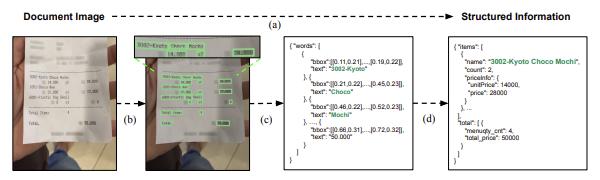  
##### **(a) document image(문서 이미지)**
**목표**: 주어진 반구조적 문서 이미지에서 구조화된 정보를 추출하는 것
##### **(b) 1st. text detection(텍스트 감지)**
문서 이미지에서 text가 존재하는 영역 감지  
- text 감지 수행 -> text 위치 얻음  
- 이미지 내에서 text가 있는 영역을 box로 표시함
##### **(c) 2nd. text recognition(텍스트 인식)**
감지된 각 box 내부의 문자를 읽어 디지털 텍스트로 변환하는 과정  
- 각 box가 인식기에 전달되어 문자를 인식함 -> text 위치, text 내용이 추출됨
- bbox: 이미지 내에서 텍스트가 위치한 좌표(text 위치)
- text: text 내용
##### **(d) 3rd. text parsing(텍스트 파싱): 구조화된 정보로 변환**
문서 내의 텍스트를 특정 형식(예: JSON)으로 변환하여 유의미한 데이터를 추출하는 과정  
- 인식된 텍스트와 그 위치가 다음 모듈로 전달되어 원하는 구조화된 형태의 정보로 처리됨
- items: 문서 내의 개별 항목 정보. 각 항목은 이름(name), 수량(count), 가격 정보(priceInfo)를 포함함.
- total: 문서의 총합 정보. 전체 항목 수(menuqty_cnt)와 총 가격(total_price)을 나타냄.
##### **Q. OCR을 사용하여 text 읽기 작업을 수행하는 과정은 어느 부분인가?**
- text 감지와 text 인식까지임.
- OCR의 전체 프로세스는 문서 이미지에서 텍스트를 감지하고, 감지된 텍스트를 인식하여 디지털 텍스트로 변환하는 것임.
##### **Q. 파싱(parsing)이란?**
- "파싱(parsing)"이란 "분석"을 의미함.
- CS와 언어 처리 분야에서, 파싱은 **입력 데이터를 구조화된 형식으로 변환하는 과정**임.
#### **Fig. 2. 파이프라인 개요 및 벤치마크**
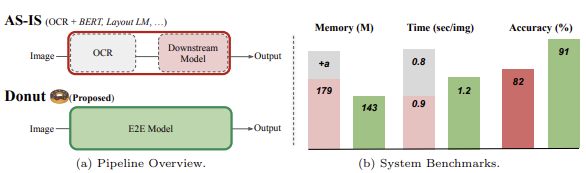  
##### **(a) 파이프라인 개요**
- **AS-IS (기존 방법)**
    - **OCR 기반**: 문서 이미지를 OCR 엔진에 입력하여 text를 추출한 후, 후속 모델(BERT, Layout LM)이 이 text를 처리하여 최종 output 생성
- **Donut (제안된 방법)**
    - **End-to-End model**: 문서 이미지를 직접 입력하여 최종 출력을 생성함. OCR을 사용하지 않으며 통합된 하나의 model로 전체 작업을 수행함.
##### **(b) 시스템 벤치마크**
Donut model이 기존의 OCR 기반 VDU model에 비해 memory 사용량, 처리 시간, 정확도 면에서 더 우수함
### **새로운 방법론: <span style="background-color:#fff5b1">Donut(Document understanding transformer)</span>**
- OCR 없이 정제되지 않은(raw) 입력 이미지에서 원하는 출력으로 직접 매핑하는 OCR-free VDU 모델
- transformer(*end-to-end transformer*)만을 기반으로 한 아키텍처
#### **Donut training**
Donut 훈련에서 사전 훈련(pre-training) 및 미세 조정(fine-tuning) 방식을 사용함
##### **사전 훈련(pre-training)**
image와 이전 text context를 조건으로 하여 다음 단어를 예측함으로써 text 읽는 방법을 학습함  
-> "how to read the texts"
- **사전 훈련 목표**: reading the texts -> 단순함! 그래서 합성 데이터(synthetic data)를 사용하여 domain 및 언어 유연성을 간단히 실현할 수 있음
##### **미세 조정(fine-tuning)**
downstream task에 따라 전체 문서를 이해하는 방법을 학습함  
-> "how to understand the whole document"
#### **기여 요약**
1. 새로운 OCR-free 접근 방식
    - VDU를 위한 새로운 **OCR-free** 접근 방식을 제안함
    - end-to-end 방식으로 훈련된 최초의 OCR-free transformer 방법임
2. 합성 데이터 사용
    - **합성 데이터**를 활용할 수 있는 간단한 사전 훈련 방식을 도입
    - 합성 데이터 생성기인 SynthDoG를 사용 -> Donut이 다중 언어 설정으로 쉽게 확장될 수 있음
3. 광범위한 실험 및 분석
    - 공공 벤치마크와 민간 산업 데이터셋 모두에서 광범위한 실험과 분석을 통해 제안된 방법(Donut)이 SOTA 성능을 달성할 뿐만 아니라 실제 응용에서 많은 실용적인 이점을 가지고 있음
4. 공개 자료
    - 코드베이스, 사전 훈련된 모델, 합성 데이터는 GitHub에서 이용 가능

---

## **Method**
### **Document Understanding Transformer**
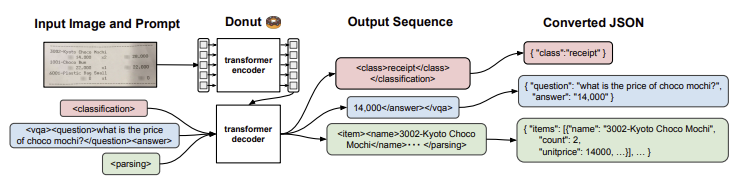
**Fig. 3.** Donut의 파이프라인
#### **Donut model**
- **end-to-end VDU model**: OCR module 없이 시각 encoder와 textual decoder 기반의 transformer로 구성됨
- **visual encoder**: 문서 이미지에서 특징 추출
- **textual decoder**: 추출된 특징을 subword token sequence로 mapping -> 구조화된 형식(e.g., JSON) 생성

#### **Encoder**
CNN 기반 모델 or trasformer 기반 모델을 encoder network로 사용 가능  
-> 본 연구에서는 swin transformer 사용함 (why? 문서 파싱에서 최고의 성능을 보임)
##### **visual encoder (시각 인코더)**
**입력 이미지 $x$를 임베딩 set $\{ z_i \mid z_i \in \mathbb{R}^d, 1 \leq i \leq n \}$로 변환**
- **$x$: 입력 문서 이미지**
    - 크기 $H×W×C$인 3차원 배열
- **$n$: feature map 크기 or 이미지 패치의 수**
    - transformer 기반 모델: $n$ = 이미지 패치의 수
    - CNN 기반 모델: $n$ = feature map 크기
- **$d$: encoder의 잠재 벡터 차원**
    - 각 patch가 encoding된 vector의 차원수
##### <span style="background-color:#fff5b1">**Swin Transformer**</span> [(Swin Transformer 논문)](https://arxiv.org/abs/2103.14030)
<span style="background-color:#FFE6E6">**컴퓨터 비전 작업을 위한 transformer model**로, **이동된 윈도우(shifted windows) 방식**을 사용하여 이미지를 효율적으로 처리함.</span> 계층적 구조를 통해 다양한 크기의 시각적 객체를 처리할 수 있으며, 이미지 분류, 객체 탐지, 의미적 분할 등 다양한 비전 작업에서 뛰어난 성능을 발휘함.

각 단계마다 하는 것: image의 patch들이 병합되고, 더 큰 context를 이해할 수 있도록 처리됨
- **1. 입력 이미지 분할**: 입력 이미지 $x$를 겹치지 않는 patch로 분할함
- **2. patch embedding**: 각 patch는 평탄화(flatten)되고, 선형 변환을 통해 $d$차원의 embedding vecotr로 변환됨 = patch token
    - **patch token**: image의 작은 조각(patch)을 vector로 표현한 것
- **3. swin transformer block**: 각 patch(*patch token을 입력으로 받음*)에 swin transformer block 적용 -> 특징 추출
   - **swin transformer block**: 이동된 윈도우 기반 멀티-헤드 셀프 어텐션(shifted window-based multi-head self-attention) module과 2층 MLP로 구성
- **4. patch 병합**: 각 단계에서 patch token에 merging layer 적용 -> 여러 patch를 병합하여 더 큰 patch로 만들고, 다음 단계로 전달함
    - **patch merging layer(패치 병합 레이어)**: 여러 patch를 결합하여 더 큰 영역의 특징을 학습할 수 있게 함
- **5. 출력 전달**: 최종 swin transformer block의 출력 {$z$}는 이후 textual decoder에 전달

##### **Q. $x$는 높이 $H$, 너비 $W$, 채널 수 $C$를 가진 입력 문서 이미지를 벡터화한 것인가?**
NO. 
- <span style="background-color:#DCFFE4">$x$는 **높이 $H$, 너비 $W$, 채널 수 $C$를 가진 입력 문서 이미지 자체**를 나타냄.</span> (원본 이미지 데이터를 의미함)
- 벡터화는 인코딩 과정에서 이루어짐 -> Donut model의 시각 인코더는 이 입력 이미지($x$)를 임베딩 벡터로 변환함
##### **Q. 패치(patch)와 필터(filter)는 다른 개념인가?** (o)
*문서 이미지를 처리하는 부분이다 보니 CNN 관련 개념과 혼동이 왔었음. -> 여기서는 CNN과 transformer를 구분해야 함! 즉, visual encoder로 CNN을 쓸 수도 있고 transformer로도 쓸 수 있는데, 이 논문에서는 swin transformer를 쓴 것임. 그래서 우리는 patch에 집중하면 됨!*  
다른 개념이다!  
- <span style="background-color:#DCFFE4">**패치 (Patch)**: 입력 이미지에서 일정한 크기의 작은 조각들</span>
    - 주로 transformer 기반 모델에서 사용됨
    - **이미지를 여러 개의 작은 조각으로 나눔. 각 패치는 독립적으로 처리됨.**
    - 처리 방법: <span style="background-color:#DCFFE4">각 패치가 독립적으로 처리되어 임베딩 벡터로 변환됨. 이 벡터들은 모델의 입력으로 사용됨</span>
    - ision Transformer(ViT), Swin Transformer 등에서 사용됨
- **필터 (Filter)**: 컨볼루션 연산에서 사용되는 매개변수
    - 주로 CNN 기반 모델에서 사용됨
    - **컨볼루션 연산을 통해 이미지를 슬라이딩하며 특징을 추출하는 매개변수**
    - 처리 방법: 필터가 이미지 위를 슬라이딩하면서 특정 특징을 감지하고 이를 특징 맵으로 변환함
    - 일반적인 CNN, ResNet, VGGNet 등에서 사용됨
##### **Q. 이동된 윈도우 기반 멀티-헤드 셀프 어텐션(shifted window-based multi-head self-attention)란 무슨 의미인가?**
- **일반적인 윈도우 기반 어텐션**
    - **윈도우(window)**: 이미지나 시퀀스를 일정 크기의 블록(윈도우)으로 나눔
    - **attention 연산**: 각 window 내에서만 attention 연산 수행 -> window 내부의 정보에 집중
    - **한계점**: 각 window가 독립적으로 처리되어, window 간의 정보 교환이 어려움 -> global context(ex: 전체 이미지에 대한 정보)를 학습하는데 제한적일 수 있음 (*shifted window로 한계점 극복*)
- **이동된 윈도우 (shifted window)**
    - **idea**: window 간의 정보 교환을 위해 일정 단계마다 window를 이동(shift)시켜 겹치게 만듦
    - **window 이동**: 각 layer에서 window를 일정 픽셀 수만큼 이동시킴 -> 인접한 window 간의 정보 교환 가능
    - **효과**: shifted window를 통해 window 간의 경계에서 발생하는 정보 손실을 줄이고, 전체 이미지를 더 잘 이해할 수 있음
- **multi-head self-attention**
    - **multi-head**: 여러 개의 attention head를 사용하여 서로 다른 부분의 정보를 동시에 학습
    - **self attention**: input sequence 내의 각 요소가 다른 요소들과 상호작용하여 중요한 정보를 학습함
##### **Q. 그냥 attention과 self-attention은 같은 개념인가?** (x)
- self-attention은 특히 input sequence 내의 관계를 모델링하는데 중점을 둠  
- **주요 차이점**
    1. 상호작용 범위
        - **attention**: encoder와 decoder 사이의 상호작용 -> decoder가 encoder의 출력에 집중(attend)함
        - **self-attention**: input sequence 내의 각 요소가 동일한 sequence 내의 다른 모든 요소들과 상호작용
    2. 사용 위치
        - **attention**: 주로 encoder-decoder 구조에서 사용
        - **self-attention**: 주로 transformer model 내에서 사용, encoder와 decoder 모두에 적용됨
##### **Q. patch token이란?**
Transformer 기반 모델 특히 Vision Transformer(ViT)와 같은 모델에서 사용되는 개념으로, **image의 작은 조각(patch)을 vector로 표현한 것**
- **생성 과정**
    - 1. image 분할: 입력 이미지 $x$를 일정한 크기의 작은 조각(patch)으로 나눔
    - 2. patch 벡터화(patch embedding): 각 patch는 flatten(평탄화) 과정을 통해 1차원 vector로 변환됨 -> 이 vector에 선형 변환(linear transformation)을 적용하여 고정된 크기($d$차원)의 embedding vector로 변환
    - 3. patch token 생성: 변환된 embedding vector = patch token -> transformer model의 입력으로 사용됨
    - 4. 위치 encoding: 각 patch token에 위치 정보 추가 -> 순서나 위치 정보 보존
##### **Q. swin transformer에서 입력 이미지를 patch로 분할함으로써 얻는 장점**
1. 효율적인 계산
    - 계산 비용 감소: 각 patch 내에서 self-attention 연산을 수행함 -> 전체 이미지를 한 번에 처리하는 것보다 계산 비용을 줄이고, 메모리 사용량 감소시킴
    - 윈도우 기반 연산: patch 기반으로 window 내에서만 self-attention 수행 -> 전역적으로 self-attention을 수행하는 기존의 transformer model에 비해 계산 효율이 높음
2. 멀티스케일 처리
   - patch를 통해 입력 이미지를 다양한 scale로 처리 -> 이미지의 다양한 해상도에서 중요한 특징을 효과적으로 추출 가능(이미지 내의 작은 detail부터 큰 구조까지 모두 잘 반영할 수 있도록 함!)
   - **Q. 해상도란?**
       - 픽셀의 밀도 (픽셀들이 얼마나 밀집되어 있는지)
       - 이미지나 화면의 세밀함과 선명도 결정  
         => 해상도가 높을수록 -> 더 많은 픽셀이 사용됨 -> 더 세밀하고 선명한 이미지
       - **해상도 표현**: 가로 픽셀 수 x 세로 픽셀 수
       - ex) 해상도가 1920 x 1080인 디스플레이: 가로에 1920개의 픽셀, 세로에 1080개의 픽셀이 배열되어 있음
       - **픽셀(pixel)**: 디지털 이미지의 가장 작은 단위, 색상 정보를 포함한 작은 점
3. 대규모 이미지 처리(유연한 확장성)
   - patch 단위로 나누어 처리함 -> 큰 이미지나 고해상도 이미지도 비교적 쉽게 처리 가능
   - swin transformer: 다양한 크기의 입력 이미지를 효율적으로 처리
4. 로컬 및 글로벌 context 처리
   - 로컬 정보 강화: patch 내 연산 -> 로컬 정보 집중적 처리, 이미지의 세부적인 부분에 대한 정보 강화
   - 글로벌 context 연결: 이후의 window의 이동 -> 서로 다른 patch 간의 정보 연결, global context 통합
#### **Decoder**
- **decoder의 input**: encoder에서 나온 잠재 벡터 {$z$}
- **decoder의 output**: token sequence $(y_i)_{i=1}^m$
    - $y_i \in \mathbb{R}^v$: $i$번째 token에 대한 one-hot vector
    - $v$: token 어휘의 크기 (=어휘에 포함된 총 단어 수)
    - $m$: sequence 길이를 결정하는 hyperparameter (= 생성할 token sequence의 길이)
- **사용된 model**: <span style="background-color:#FFE6E6">BART</span>
    - 공개된 다중 언어 BART 모델의 사전 훈련된 가중치로 디코더 모델의 가중치를 초기화됨
 
#### **Model Input**
##### **model input 방식: <span style="background-color:#FFE6E6">teacher-forcing scheme**</span>
- 각 시간 단계에서 이전 시간 단계의 model output(*예측값*) 대신 이전 시간 단계의 **ground truth(=*실제값, label값*)을 input으로 사용하는 훈련 방법**
- sequence model을 훈련시키는 데 사용되는 기법, 순차적인 데이터를 다루는 모델에서 자주 사용됨
- **동작 방식**: model은 시간 단계 $t$에서의 실제 정답(ground truth)을 다음 시간 단계 $t+1$에서의 입력으로 사용함 -> model이 학습 초기 단계에서 더 빠르고 안정적으로 학습 가능
    - 일반적인 sequence model 훈련: 시간 단계 $t$에서의 출력을 다음 시간 단계 $t+1$에서의 입력으로 사용 -> 이전 시간 단계의 예측이 잘못되면, 이후 단계들도 영향을 받아 학습이 어려워질 수 있음
- **장점**
    - 빠른 수렴: 모델이 더 빠르게 학습하고, 초기 단계에서 안정적으로 훈련될 수 있음
    - 오류 축적 방지: 잘못된 예측이 다음 단계의 입력으로 사용되지 않음 -> 오류 축적 방지
- **단점**:
    - 실제 응용 단계에서의 어려움: 실제 응용 단계에서는 모델의 예측값을 입력으로 사용해야 하기 때문에, 학습 단계와의 차이로 인해 성능이 저하될 수 있음
##### **test 단계**
프롬프트 기반 생성: (GPT-3에서 영감 받아) model이 주어진 prompt를 바탕으로 token sequence 생성
##### **특수 token 추가**
각 downstream task에 대해 prompt를 위한 새로운 special token을 추가 -> 모델이 각 task에 맞게 조정될 수 있도록 도와줌 (ex: [START *], [END *])
##### **prompt와 output sequence**
실험에서 사용한 프롬프트와 출력 시퀀스는 Fig. 3.에 있음

#### **Output Conversion**
구현: 간단한 정규 표현식 사용해서 쉽게 구현 가능
##### **output token sequence 변환**
- output token sequence -> 원하는 구조화된 형식(ex: JSON)으로 변환
- JSON 형식 채택함!-> why? 높은 표현 능력 때문
##### **JSON 형식 변환**
- token sequence를 JSON data로 일대일 변환 가능
- special token: [START *], [END *] (*:각 field)
##### **잘못된 구조 처리**
- if output token sequence가 잘못된 구조 가지면 -> 해당 field는 손실된 것으로 간주
- ex) [START name]만 있고 [END name]이 없는 경우, "name" 필드 추출 실패로 간주

### **Pre-training**
**how to read**: *model에게 읽는 법을 알려주자!*
- **사전 훈련**
    - model이 image 내의 모든 text를 읽기 순서(기본적으로 왼쪽 위에서 오른쪽 아래)대로 읽도록 훈련
    - 시각 언어 모델(visual language model)로서 시각 코퍼스(문서 이미지)를 대상으로 훈련
- **목표**: image와 이전 context 기반으로 다음 token 예측의 cross-entropy loss를 최소화
#### **Visual Corpora (시각 코퍼스)**
- **dataset**: IIT-CDIP (1100만 개의 스캔된 영어 문서 이미지 세트) 사용
- **OCR model을 사용하여 가짜 text label 생성**: 상용 CLOVA OCR API 사용하여 생성
    - **text label**: 문서 이미지에 포함된 텍스트를 디지털 텍스트 형식으로 변환한 것(문서 이미지에서 추출된 text)
    - **Q. 왜 가짜 text label을 생성하는가?**  
      -> *IIT-CDIP dataset의 많은 문서 이미지에는 text label이 제공되지 않기 때문에 연구자들이 직접 OCR tool을 사용하여 text를 추출해야 함! 그래서 위와 같은 과정을 수행하는 것임*
- **SynthDoG 구축**
    - 영어 이외의 언어에서도 사용할 수 있도록(의존성 감소) 합성 문서 생성기를 구축함
    - SynthDoG와 Wikipedia 사용 -> 중국어, 일본어, 한국어, 영어 샘플을 각각 50만 개씩 생성
#### **SynthDoG(Synthetic Document Generator, 합성 문서 생성기)**
- **image rendering pipeline**: Yim et al. [67]을 따름
    - **Q. image rendering이란?**  
      -> 이미 존재하는 데이터(주로 2D 또는 3D 모델)를 시각적으로 표현 가능한 이미지로 변환하는(만드는) 과정 (*이미지 생성과는 다른 의미임*)
- **생성된 sample의 구성 요소**
    - **배경**: ImageNet에서 샘플링
        - **ImageNet**: 대규모 이미지 dataset (CV, DL 연구에서 많이 사용됨)
    - **문서 텍스처**: 수집된 종이 사진에서 샘플링
    - **단어와 구**: Wikipedia에서 샘플링
    - **레이아웃**: 규칙 기반 알고리즘으로 생성
    - **image rendering 기술**: 여러 기술을 적용하여 실제 문서 모방
- **결과**  
  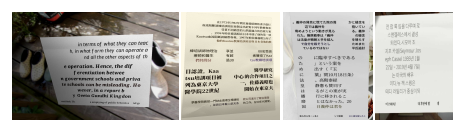  
**Fig. 4.** SynthDoG를 사용하여 생성된 영어, 중국어, 일본어 및 한국어 샘플. 실제 문서를 모방하기 위해 휴리스틱 랜덤 패턴이 적용됨.

### **Fine-tuning**
**how to understand**: *model에게 이해하는 법을 알려주자!*
- **미세 조정의 목표**: JSON 예측 문제 (*"모든 downstream task를 JSON 예측 문제로 해석한다"*)
- **decoder 훈련**
    - (원하는 출력 정보를 나타내는) **JSON으로 변환될 수 있는 token sequence를 생성하도록** 훈련됨
    - ex) in 문서 분류, decoder는 [START class][memo][END class]와 같은 token sequence 생성 -> 이 token sequence는 JSON {"class":"memo"}로 변환됨
- **special token 도입**
    - 특정 타겟 작업에서 필요한 경우 특수 토큰을 도입
    - ex) [memo]는 "memo" 클래스를 나타내는 데 사용
##### **Q. (Fig. 3.에서) downstream task란?**
**다운스트림 작업(downstream task)**: 사전 훈련된 모델을 특정 작업에 맞춰 모델을 더 세부적으로 훈련시키는(미세 조정하는) 작업
- **그림에서 제시된 downstream task**
    - 분류: 문서 유형 분류
    - 질문 응답: 문서에서 질문에 대한 답변 추출
    - 파싱: 문서의 구조화된 데이터 추출
- **목적**: 모델이 문서 이미지를 이해하고, 필요한 정보를 정확하게 추출할 수 있도록 훈련하는 것

---

## **Experiments and Analyses**
- 6개의 다양한 dataset에서 3개의 VDU application에 대한 Donut의 fine-tuning 결과를 제시함  
  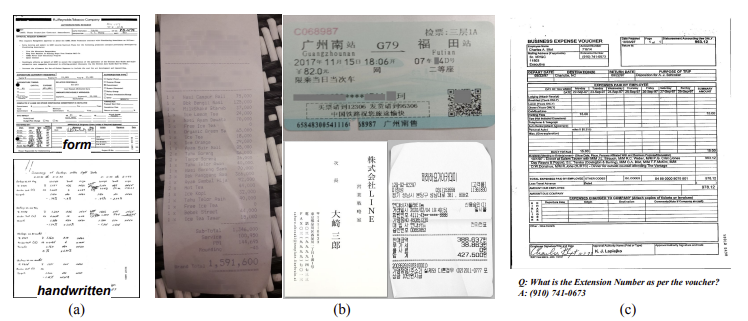  
  **Fig. 5.** downstream dataset의 sample
- **VDU application**
    - (a) 문서 분류(Document Classification)
    - (b) 문서 정보 추출(Document Information Extraction)
    - (c) 문서 시각적 질문 답변(Document Visual Question Answering)

### **Downstrea Tasks and Datasets**
#### **문서 분류(Document Classification)**
- **목적**: 모델이 다양한 유형의 문서를 정확하게 구분할 수 있는지 평가
- **방법**: 다른 모델들(softmax 통해서 class label 예측)과 달리 Donut은 class 정보를 포함하는 JSON을 생성 -> 작업 해결 방법의 일관성 유지
- **결과 측정**: test set에 대한 전체 분류 정확도
- **RVL-CDIP dataset**
    - 구성: 16개의 클래스에 걸쳐 40만 개의 이미지를 포함
    - class 예시: 편지, 메모, 이메일 등
    - 32만 개의 훈련 이미지, 4만 개의 검증 이미지, 4만 개의 테스트 이미지

#### <span style="background-color:#fff5b1">**문서 정보 추출(Document Information Extraction)**</span>
- **목적**: <span style="background-color:#FFE6E6">**문서의 복잡한 layout과 context(맥락)을 완전히 이해**</span>할 수 있는지 확인하기 위함 -> 공공 벤치마크와 실제 산업 dataset을 포함한 다양한 실제 문서 이미지에서 문서 IE task를 test함
    - **layout**: 문서의 시각적 구조  
      ex) 제목이 상단에 있고 본문이 그 아래에, 그리고 하단에 각주가 있는 배치
- **목표**: **문서를** 목표 온톨로지(target ontology)나 데이터베이스 스키마(DB schema)와 일치하는 **구조화된 정보로 매핑하는 것**
    - **ontology**: 특정 도메인 내에서 사용되는 개념들과 그들 간의 관계를 명확하게 정의하고 구조화하는 체계적인 데이터 모델
        - 구성 요소: class, instance, property, relation
        - ai에서 ontology: 복잡한 도메인의 개념을 체계적으로 표현하여 ai가 해당 도메인에 대한 지식을 이해하고 활용할 수 있도록 돕는 중요한 도구
        - ex1) 의료 온톨로지: "환자", "질병", "의사" 등의 개념과 그들 간의 관계를 정의
        - ex2) 전자 상거래 온톨로지: "제품", "가격", "판매자" 등의 개념과 관계 정의 -> ai가 제품 추천 시스템을 더 잘 이해하고 제공할 수 있도록 함
    - **database schema**: DB에서 data를 구조화하는 방법을 정의한 
        - table, column(field), data type, relation 등을 정의 -> data가 어떻게 저장되고 연결되는지 명확히 규정
- <span style="background-color:#FFE6E6">model이 text 간의 그룹 및 중첩 계층 구조를 추론</span>하기 위해 layout과 의미를 이해해야 함 (*단순히 문자 읽는 것을 넘어서!*)
    - **중첩 계층 구조**: 정보가 포함된 형태로 배열된 구조로, 상위 항목이 하위 항목을 포함하는 형태임.
        - ex) "항목 (Item)"이라는 정보는 이름(Name), 수량(Count), 단가(Unit Price)라는 세부 항목을 포함함
            - 항목(Item):
                - 이름 (Name): "Yejin Yeo"
                - 수량 (Count): 2
                - 단가 (Unit Price): 14,000원
- **평가 지표**
    - **field-level F1 score(필드 수준 F1 점수)**
        - 추출된 field 정보가 ground truth(실제 정답)에 있는지 확인
        - 단 하나의 문자라도 누락되면 -> field 추출 실패로 간주됨(*점수 낮아짐*)
        - 장점: 단순함, 이해하기 쉬움
        - 한계점
            - 1. 부분적인 중첩(ex: 일부만 일치하는 경우)을 고려하지 않음
            - 2. 예측된 구조(ex: 그룹 및 중첩 계층)를 측정할 수 없음
    - **Tree Edit Distance(TED) based accuracy(트리 편집 거리 기반 정확도)**: 문서의 전체적인 구조를 고려하여 예측된 트리와 실제 트리 간의 유사성 측정
        - TED 기반 지표 사용
            - 목적: 전체적인 정확도를 평가하기 위함
            - 트리 구조로 표현된 모든 문서에서 사용 가능한 지표임
            - 최근의 문서 정보 추출(IE) 연구에서도 사용됨
        - 계산식: $\text{max}\left(0, 1 - \frac{\text{TED}(pr, gt)}{\text{TED}(\phi, gt)}\right)$
            - $gt$: 실제 정답(ground truth)
            - $pr$: 예측값(predicted)
            - $\phi$: 빈 트리(empty tree)
- **dataset**: 공공 벤치마크 데이터셋 2개, 실제 산업 서비스 제품에서 가져온 개인 데이터셋 2개
    - **CORD**: 0.8K의 훈련 이미지, 0.1K의 검증 이미지, 0.1K의 테스트 이미지 (영수증, 라틴 알파벳)
    - **Ticket**: 1.5K의 훈련 이미지와 0.4K의 테스트 이미지 (기차 티켓, 중국어)
    - **명함(In-Service Data)**: 2만 개의 훈련 이미지, 0.3K의 검증 이미지, 0.3K의 테스트 이미지
    - **영수증(In-Service Data)**: 4만 개의 훈련 이미지, 1K의 검증 이미지, 1K의 테스트 이미지 (한국어, 모든 샘플 공개적 사용 불가능)

#### **문서 시각적 질문 답변(Document Visual Question Answering)**
- 모델의 추가적인 능력을 검증하기 위한 작업
- 문서 이미지와 질문 쌍이 주어지며, 모델이 이미지 내의 시각적 및 텍스트 정보를 바탕으로 답변을 예측
- **방법**: 질문을 시작 프롬프트로 설정하여 decoder가 답변을 생성하게 함 (방법의 일관성 유지)
    - **decoder의 동작 방식**
        - **입력**: 질문
        - **출력**: 입력된 질문을 바탕으로 적절한 답변 생성
        - ex) "What is the price of choco mochi?"라는 질문이 주어지면, 디코더는 이 질문을 시작 프롬프트로 받아들여 답변을 생성함. -> 결과적으로 "14,000"이라는 답변을 출력
- **평가 지표**: ANLS(Average Normalized Levenshtein Similarity, 편집 거리 기반 지표)
- test set에 대한 점수는 평가 사이트를 통해 측정
- **DocVQA dataset**
    - 문서 시각적 질문 답변 대회에서 제공된 데이터셋
    - 12,000개 이상의 문서에 대해 정의된 50,000개의 질문
    - 40,000개의 훈련 질문, 5,000개의 검증 질문, 5,000개의 테스트 질문으로 구성


### **Setups**
- **visual encoder**: 약간 수정된 Swin-B 사용
    - **layer numbers(레이어 수)** = {2,2,14,2} (*기존 Swin-B: layer numbers = {2,2,18,2}*)
        - 각 단계(stage)에서 사용하는 layer 수를 나타냄
        - 첫 번째와 두 번째, 네 번째 단계에서는 2개의 layer를, 세 번째 단계에서는 14개의 layer를 사용함 
    - **window size**: 10
        - swin transformer에서 **window size = patch size(패치의 크기)**
        - *in swin transformer, window = patch*
- **decoder**: BART의 첫 4개 layer 사용
- **train data**: 200만 개의 합성 데이터 및 1,100만 개의 IIT-CDIP 스캔 문서 이미지
- **pre-train(사전 훈련)**: 64개의 A100 GPU와 미니 배치 크기 196으로 20만 스텝 동안 훈련
    - **optimizer**: Adam
    - **initial learning rate**: 1e-5에서 1e-4
- **입력 해상도**: 2560×1920 (Train Tickets와 Business Card 파싱 작업에서는 960×1280 해상도 사용)
- **디코더 최대 길이**: 1536
- **fine-tuning(미세 조정)**
    - pre-train된 다국어 모델(multi-lingual model)에서 시작
    -  토큰 시퀀스의 편집 거리를 모니터링하면서 model을 fine-tuning함
- 속도 측정: P40 GPU 사용
##### **Q. pre-train detail**
("We pre-train the model for 200K steps with 64 A100 GPUs and a mini-batch size of 196." 의미)
- **200K steps**: model을 총 200,000번의 학습 단계(step)를 통해 pre-train함 (각 step마다 model이 한 번의 학습을 수행함)
- **미니 배치 크기(mini-batch size of 196)**: 한 번의 step에서 사용되는 data sample의 수 -> 196개의 sample을 한 번에 처리하며 모델을 업데이트함
    - **미니 배치 학습**: 데이터셋을 여러 작은 부분으로 나누어 각 부분(미니 배치)마다 모델을 업데이트 -> 장점: 메모리 효율이 높음, 훈련 속도가 빠름, 모델이 더 일반화된 성능을 얻는 데 도움이 됨, 큰 데이터셋을 처리할 때 유용함, 모델이 더 빠르게 수렴할 수 있도록 도와줌

### **Experimental Results**
#### **Document Classification**
Donut model이 기존 OCR 기반 모델보다 더 효율적이고 강력한 성능을 보여줌. 특히 OCR 기반 시스템의 훈련 및 유지 관리에는 많은 비용이 소요되므로 Donut과 같은 end-to-end 접근 방식이 더 유리함.
##### **Table 1. RVL-CDIP 데이터셋에 대한 분류 결과**
- 합리적인 속도와 모델 크기 효율성으로 최첨단 성능(SOTA) 달성
- <span style="background-color:#FFE6E6">Donut은 범용 백본(backbone)</span>이지만 다른 최신 백본(e.g., LayoutLM)과 달리 OCR에 의존하지 않음
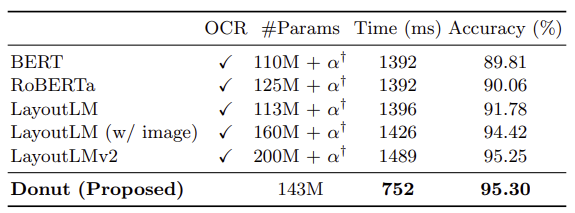

##### **Q. "general purpose backbone"이란?**
- **백본(Backbone)**: 딥러닝 모델(*신경망*)의 핵심 구조
    - 주어진 입력(ex: 이미지)을 처리하여 유용한 특징(feature)을 추출하는 역할
    - 백본은 다른 작업에 사용될 추가적인 모듈이나 레이어들이 이 특징을 기반으로 작업을 수행하게 함
- **범용(General-purpose)**: 특정한 작업에만 사용되는 것이 아니라, 이미지 분류, 객체 탐지, 세그멘테이션 등 다양한 비전 작업에서 사용할 수 있는 모델
##### **Q. BERT란?** [(BERT 논문)](https://arxiv.org/abs/1810.04805) [(BERT 이해)](https://wikidocs.net/115055)
위키피디아(25억 단어)와 BooksCorpus(8억 단어)와 같은 레이블이 없는 텍스트 데이터로 사전 훈련된, NLP 작업을 위해 개발된 문맥을 양방향으로 이해하는 transformer 기반 언어 모델
##### **Q.LayoutLMv2란?** [(LayoutLMv2 논문)](https://arxiv.org/abs/2012.14740)
- 시각적 문서 이해(VDU) task에서 text, layout, image 간의 상호작용을 효과적으로 모델링하기 위해 설계된 multi-modal transformer 아키텍처임
- UNSD, CORD, SROIE, Kleister-NDA, RVL-CDIP, DocVQA 등의 다양한 VDU 작업에서 이전 버전 모델인 LayoutLM을 크게 능가하는 성능을 보임

#### **Document Information Extraction**
- **문서 정보 추출(IE) 작업 성능**
    - 성능: Donut model > 다른 model들
    - F1 점수와 트리 편집 거리(TED) 기반의 정확도 -> Donut이 복잡한 구조를 예측하고 정보를 효과적으로 추출할 수 있음을 확인함
- **비교 모델**
    - BERT, BROS, LayoutLM, LayoutLMv2와 같은 범용 VDU 백본 모델들과 최근 제안된 SPADE, WYVERN 모델들과 비교하여 테스트됨
    - Donut: OCR 없이 엔드 투 엔드 방식으로 동작함. 특히 OCR 기반 모델들보다 효율적이고 정확함
- **해상도와 성능**
    - 해상도 높을수록 -> 정확도 높음 but 추론 속도 느려짐 (trade-off)
    - 그럼에도 donut은 자원이 제한된 환경에서 더 나은 성능을 발휘함
- **안정성**
    - 데이터셋 크기와 작업의 복잡성에 관계없이 안정적인 성능을 보여줌
##### **Table 2. 다양한 문서 IE 작업에 대한 성능**
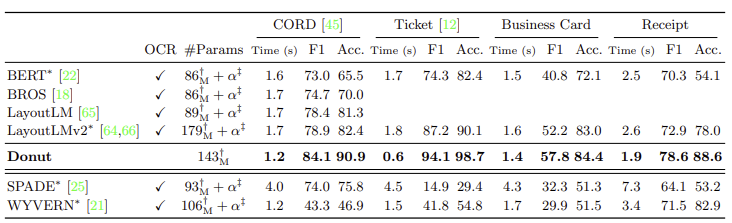

#### **Document Visual Question Answering**
- **DocVQA 결과**
    - 성능: 외부 OCR 엔진에 의존하는 모델들과 비교해 donut이 경쟁력 있는 성능을 보여줌
    - 특히 손글씨 문서에서 뛰어난 성능을 보임 (손글씨 문서는 처리하기 어려운 것으로 알려짐)
- **기존 접근 방식과의 비교**
    - 기존: CR 오류를 수정하기 위한 후처리 모듈이나 인코더-디코더 아키텍처를 추가하여 성능 개선 -> 단점: 시스템 크기와 유지 비용 증가
    - Donut: end-to-end 방식으로 동작 -> 시스템 간소화 및 성능 유지
##### **Table 3. DocVQA에서 평균 정규화된 Levenshtein 유사도(ANLS) 점수**
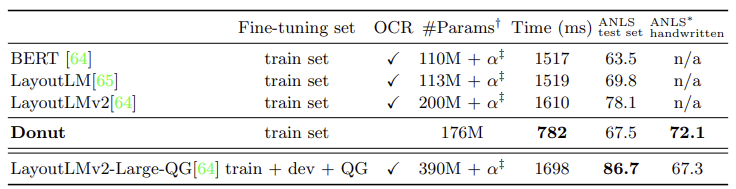
##### **Fig. 6.** DocVQA에서 Donut과 LayoutLMv2 출력의 예시
- Donut: end-to-end pipeline의 입력 해상도 제한으로 인해 대규모 이미지에서 일부 작은 text를 놓침 (*세번째 그림 참고*) -> but 이는 입력이미지 크기를 조정하여 완화 가능함
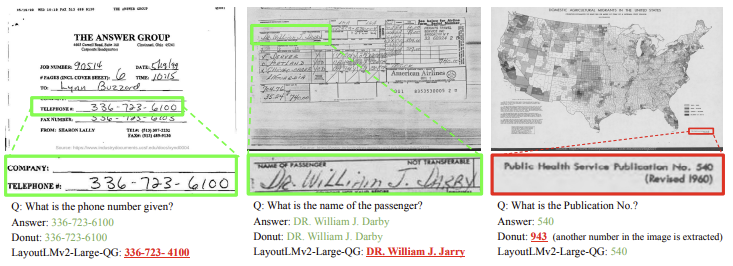


### **Further studies**
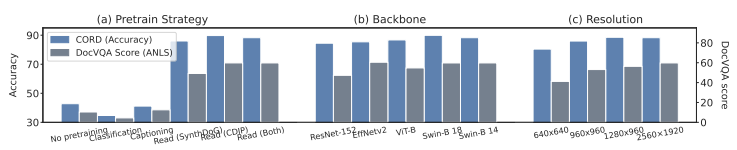
**Fig. 7.** (a) 사전 훈련 전략, (b) 이미지 백본, (c) 입력 해상도에 대한 분석
- CORD와 DocVQA dataset에서의 성능이 표시되어 있음
    - CORD dataset: 문서 IE task에서 쓰인 dataset임
- 논문 내용 기반 채택된 것 (*확인 필요*)
    - (a) Read (Both)
    - (b) Swin-B 14
    - (c) 2560 x 1920

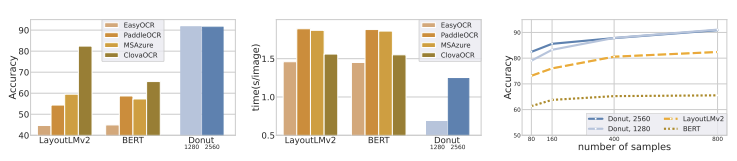
**Fig. 9.** CORD 데이터셋에서 BERT, LayoutLMv2, Donut의 비교
- **OCR 기반 모델의 성능 변화**
    - BERT와 LayoutLMv2 같은 OCR 기반 모델들은 사용하는 OCR 엔진에 따라 성능(속도와 정확도)이 크게 달라짐
    - 즉, OCR 엔진의 품질과 정확도에 따라 모델의 전체적인 성능이 좌우됨
- **Donut의 견고한 성능**
    - Donut은 자원이 제한된 상황에서도 안정적인 성능을 유지함
    - CORD 데이터셋에서 단 80개의 샘플만으로도 높은 성능을 발휘함 -> 적은 데이터로도 효과적으로 학습할 수 있음을 보여줌!

#### **텍스트 위치 측정 관련**
**Donut 모델은 지도 학습 없이도 문서 이미지 내에서 텍스트의 적절한 위치에 주목할 수 있는 능력을 가지고 있음**
- **모델 동작 분석**
    - 모델이 새로운 문서 이미지에 대해 어떻게 동작하는지 보기 위해, 디코더의 교차 어텐션 맵을 시각화함
    - 모델이 이미지에서 원하는 텍스트 위치에 집중하는 모습을 볼  수 있음

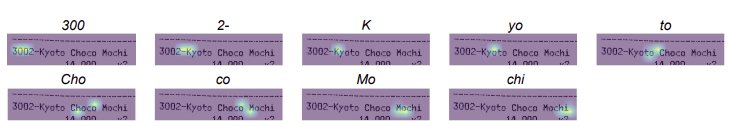
**Fig. 8.** 디코더에서의 교차 어텐션 맵 시각화 및 텍스트 위치 측정에의 적용
- **결과의 의미**
    - Donut은 위치 측정에 대한 별도의 지도 학습 없이 훈련됨
    - Donut 디코더는 이미지를 처리하기 위해 적절한 텍스트 영역에 주목함
    - 이는 모델의 성능이 실제 문서에서 텍스트를 효과적으로 처리할 수 있음을 나타내며, 이 정보를 보조 지표로 활용할 수 있음

---

## **Related Work: Visual Document Understanding**
*문서 유형의 분류는 생략함*
#### **Document IE (문서 정보 추출)**
- 영수증 디지털화 자동화와 같은 실제 응용 분야에서 사용됨
- 대부분의 최신 모델: OCR 출력을 입력으로 사용하여 정보 추출함 (OCR 결과는 종종 복잡한 여러 과정을 거쳐 최종 파싱 결과로 변환됨)
- 산업에서의 수요에도 불구하고, 산업에서는 엔드 투 엔드(end-to-end) 파싱에 대한 시도가 거의 이루어지지 않았음. 최근 몇 가지 작업이 복잡한 파싱 프로세스를 단순화하려는 시도로 제안되었지만 별도의 OCR에 의존함.
#### **Visual QA on documents (문서 시각적 질문 응답)**
- 문서 이미지에 대한 질문에 답하는 작업으로, 시각적 요소와 일반 지식을 바탕으로 정답을 추론함
- 대부분의 최신 방법들은 OCR과 transformer를 결합하여 작동함
- 한계점: 답이 이미지에 포함되지 않은 경우 -> 이를 해결하기 위해 생성 기반 방법들도 연구되고 있음

---

## **Conclusions**
1. **Donut (proposed)**
   - VDU(시각적 문서 이해)를 위한 end-to-end framework
   - 문서 이미지를 직접 원하는 구조화된 출력으로 mapping함
   - OCR에 의존하지 않음
   - 쉽게 end-to-end 방식으로 학습될 수 있음
2. **SynthDoG: 합성 데이터 생성기**
   - 실제 대규모 문서 이미지에 대한 의존성을 줄이기 위해 도입함
   - Donut이 다양한 언어 환경에서도 잘 작동할 수 있도록 함
3. **Donut 학습**
   -  처음에는 텍스트를 읽는 방법을, 그 후에는 이해하는 방법을 학습하도록 점진적으로 훈련됨
4. **성능 및 비용 효율성**
   - 외부 공공 벤치마크와 내부 서비스 데이터셋 모두에서 높은 성능과 비용 효율성을 입증함
5. **미래 연구 방향**
   - 사전 훈련 목표를 강화하는 것
   - Donut의 접근 방식은 문서 이해와 관련된 다른 도메인이나 작업으로 쉽게 확장될 수 있음